In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import calibration_curve
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

In [88]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

### 读取数据

In [89]:
data_ftp = pd.read_csv('ftp_display.csv', header = None)
data_http = pd.read_csv('http_display.csv', header = None)
data_scp = pd.read_csv('scp_display.csv', header = None)

### 添加属性名

In [90]:
col = ['ID', 'info']
for i in range(30):
    col.append('len'+str(i+7))
col1 = ['total packets', 'max packet length', 'min packet length', 'mean packet length',
       'var packet length', 'max IAT', 'min IAT', 'mean IAT', 'var IAT',
       'total packets a b', 'max packet length a b', 'min packet length a b', 'mean packet length a b',
       'var packet length a b', 'max IAT a b', 'min IAT a b', 'mean IAT a b', 'var IAT a b',
       'total packets b a', 'max packet length b a', 'min packet length b a', 'mean packet length b a',
       'var packet length b a', 'max IAT b a', 'min IAT b a', 'mean IAT b a', 'var IAT b a']
col.extend(col1)
col

['ID',
 'info',
 'len7',
 'len8',
 'len9',
 'len10',
 'len11',
 'len12',
 'len13',
 'len14',
 'len15',
 'len16',
 'len17',
 'len18',
 'len19',
 'len20',
 'len21',
 'len22',
 'len23',
 'len24',
 'len25',
 'len26',
 'len27',
 'len28',
 'len29',
 'len30',
 'len31',
 'len32',
 'len33',
 'len34',
 'len35',
 'len36',
 'total packets',
 'max packet length',
 'min packet length',
 'mean packet length',
 'var packet length',
 'max IAT',
 'min IAT',
 'mean IAT',
 'var IAT',
 'total packets a b',
 'max packet length a b',
 'min packet length a b',
 'mean packet length a b',
 'var packet length a b',
 'max IAT a b',
 'min IAT a b',
 'mean IAT a b',
 'var IAT a b',
 'total packets b a',
 'max packet length b a',
 'min packet length b a',
 'mean packet length b a',
 'var packet length b a',
 'max IAT b a',
 'min IAT b a',
 'mean IAT b a',
 'var IAT b a']

In [91]:
data_ftp.columns = col
data_http.columns = col
data_scp.columns = col

### 赋予类别，ftp：0，http：1，scp：2

In [92]:
data_ftp['class']=[0 for i in range(5000)]
data_http['class']=[1 for i in range(5000)]
data_scp['class']=[2 for i in range(5000)]

### 划分训练测试

In [93]:
X1_train,X1_test,y1_train,y1_test= train_test_split(data_ftp.iloc[:,2:-1],data_ftp.iloc[:, -1],test_size=0.2,random_state=0)
X2_train,X2_test,y2_train,y2_test= train_test_split(data_http.iloc[:,2:-1],data_http.iloc[:, -1],test_size=0.2,random_state=0)
X3_train,X3_test,y3_train,y3_test= train_test_split(data_scp.iloc[:,2:-1],data_scp.iloc[:, -1],test_size=0.2,random_state=0)

In [94]:
X_train = pd.concat([X1_train, X2_train, X3_train], axis=0)
X_test = pd.concat([X1_test, X2_test, X3_test], axis=0)
y_train = pd.concat([y1_train, y2_train, y3_train], axis=0)
y_test = pd.concat([y1_test, y2_test, y3_test], axis=0)

### 数据归一化

In [95]:
X_data = pd.concat([X_train, X_test], axis=0)
X_data = (X_data - X_data.min()) / (X_data.max() - X_data.min())
X_data = X_data.dropna(axis=1)
X_train = X_data[0:12000]
X_test = X_data[12000:15000]

In [96]:
def ConfusionMatrixShow(C):
    plt.figure(figsize=(10,6), dpi=80)
    plt.matshow(C, cmap=plt.cm.Wistia)
    plt.colorbar()
    for i in range(len(C)):
        for j in range(len(C)):
            plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center', fontsize=12)

    plt.tick_params(labelsize=12)
    plt.ylabel('真实的类别', fontsize=12)
    plt.xlabel('预测的类别', fontsize=12)
    plt.show()

### XGboost

In [98]:
print(X_data)
print(X_data.columns)

      len8      len9     len10  len11     len12  len13     len14     len15  \
2913   1.0  0.730539  0.000000    0.0  0.131868    0.0  1.000000  0.000000   
3275   1.0  0.730539  0.000000    0.0  0.131868    0.0  1.000000  0.000000   
775    1.0  0.730539  0.035928    1.0  0.043956    0.0  0.120879  0.000000   
217    1.0  0.730539  0.000000    0.0  0.131868    0.0  1.000000  0.000000   
1245   1.0  0.730539  0.000000    0.0  0.131868    0.0  1.000000  0.000000   
...    ...       ...       ...    ...       ...    ...       ...       ...   
4228   1.0  0.730539  0.000000    0.0  0.131868    0.0  1.000000  0.000000   
2367   1.0  0.730539  0.000000    0.0  0.131868    1.0  0.000000  0.363636   
788    1.0  0.730539  0.035928    1.0  0.043956    0.0  0.120879  0.000000   
1452   1.0  0.730539  0.000000    0.0  0.131868    1.0  0.000000  0.363636   
3265   1.0  0.730539  0.000000    0.0  0.131868    1.0  0.000000  0.363636   

         len16     len17  ...  min packet length a b  mean pack

### 参数优化

In [57]:
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import StratifiedKFold
#cv = StratifiedKFold(n_splits=5, shuffle=True)
#XGB = XGBClassifier(max_depth=4, eval_metric=['logloss','auc','error'], use_label_encoder=False, subsample=0.01, n_estimators=9, eta=0.15)
#accuracy_score = cross_val_score(XGB, X_data, X_data.columns, cv=cv, scoring='accuracy',n_jobs=-1)
#accuracy_score_mean = np.mean(accuracy_score)
#accuracy_score_std = np.std(accuracy_score)
#print(f"The mean: {accuracy_score_mean:.5f}\t\tThe std: {accuracy_score_std:.5f}")

In [99]:
for i in range(4,8):
        for j in range(3,8):
            accuracys=[]
            XGB = XGBClassifier(max_depth=i, min_child_weight=j, eval_metric=['logloss','auc','error'], 
                    use_label_encoder=False, subsample=0.01, n_estimators=9,eta=0.15, )
            for k in range(5):
                tdata_ftp = data_ftp.sample(frac=0.2).reset_index(drop=True)
                tdata_http = data_http.sample(frac=0.2).reset_index(drop=True)
                tdata_scp = data_scp.sample(frac=0.2).reset_index(drop=True)
                
                tX1_train,tX1_test,ty1_train,ty1_test= train_test_split(tdata_ftp.iloc[:,2:-1],tdata_ftp.iloc[:, -1],test_size=0.2,random_state=0)
                tX2_train,tX2_test,ty2_train,ty2_test= train_test_split(tdata_http.iloc[:,2:-1],tdata_http.iloc[:, -1],test_size=0.2,random_state=0)
                tX3_train,tX3_test,ty3_train,ty3_test= train_test_split(tdata_scp.iloc[:,2:-1],tdata_scp.iloc[:, -1],test_size=0.2,random_state=0)
                
                tX_train = pd.concat([tX1_train, tX2_train, tX3_train], axis=0)
                tX_test = pd.concat([tX1_test, tX2_test, tX3_test], axis=0)
                ty_train = pd.concat([ty1_train, ty2_train, ty3_train], axis=0)
                ty_test = pd.concat([ty1_test, ty2_test, ty3_test], axis=0)
                
                tX_data = pd.concat([tX_train, tX_test], axis=0)
                tX_data = (tX_data - tX_data.min()) / (tX_data.max() - tX_data.min())
                tX_data = tX_data.dropna(axis=1)
                tX_train = tX_data[0:2400]
                tX_test = tX_data[2400:3000]
                
                XGB.fit(tX_train, ty_train)
                xgb_result = XGB.predict(tX_test)
                xgb_prob = XGB.predict_proba(tX_test)

                accuracys.append(accuracy_score(ty_test, xgb_result))
                
            means=np.mean(accuracys)
            stdevs=np.std(accuracys)
            #print(format(accuracys))
            print(i, ' ', j, ' ', means, stdevs)

4   3   0.9673333333333334 0.008856886837057626
4   4   0.9633333333333333 0.008164965809277286
4   5   0.9336666666666666 0.01687865186822954
4   6   0.8896666666666666 0.02504218662799058
4   7   0.7093333333333334 0.05688780380909622
5   3   0.9626666666666667 0.008273115763993899
5   4   0.9623333333333335 0.016076207402383347
5   5   0.9413333333333332 0.021249836600678973
5   6   0.9026666666666667 0.03664544840616483
5   7   0.6576666666666666 0.06244642147918129
6   3   0.9606666666666666 0.015691469727919776
6   4   0.9650000000000001 0.005270462766947294
6   5   0.9396666666666667 0.007774602526460402
6   6   0.9029999999999999 0.019014614262602227
6   7   0.6719999999999999 0.039516522564056106
7   3   0.967 0.006271629240742286
7   4   0.9613333333333334 0.007557189365836419
7   5   0.9406666666666667 0.007571877794400375
7   6   0.8936666666666666 0.03305550887018177
7   7   0.6556666666666666 0.10226653628848709


In [100]:
i = 0.0
while(i < 1.05) :
    accuracys=[]
    XGB = XGBClassifier(max_depth=6, min_child_weight=4, eval_metric=['logloss','auc','error'], 
                    use_label_encoder=False, subsample=0.01, n_estimators=9,eta=0.15, reg_lambda=i)
    for k in range(5):
        tdata_ftp = data_ftp.sample(frac=0.2).reset_index(drop=True)
        tdata_http = data_http.sample(frac=0.2).reset_index(drop=True)
        tdata_scp = data_scp.sample(frac=0.2).reset_index(drop=True)
                
        tX1_train,tX1_test,ty1_train,ty1_test= train_test_split(tdata_ftp.iloc[:,2:-1],tdata_ftp.iloc[:, -1],test_size=0.2,random_state=0)
        tX2_train,tX2_test,ty2_train,ty2_test= train_test_split(tdata_http.iloc[:,2:-1],tdata_http.iloc[:, -1],test_size=0.2,random_state=0)
        tX3_train,tX3_test,ty3_train,ty3_test= train_test_split(tdata_scp.iloc[:,2:-1],tdata_scp.iloc[:, -1],test_size=0.2,random_state=0)
                
        tX_train = pd.concat([tX1_train, tX2_train, tX3_train], axis=0)
        tX_test = pd.concat([tX1_test, tX2_test, tX3_test], axis=0)
        ty_train = pd.concat([ty1_train, ty2_train, ty3_train], axis=0)
        ty_test = pd.concat([ty1_test, ty2_test, ty3_test], axis=0)
                
        tX_data = pd.concat([tX_train, tX_test], axis=0)
        tX_data = (tX_data - tX_data.min()) / (tX_data.max() - tX_data.min())
        tX_data = tX_data.dropna(axis=1)
        tX_train = tX_data[0:2400]
        tX_test = tX_data[2400:3000]
                
        XGB.fit(tX_train, ty_train)
        xgb_result = XGB.predict(tX_test)
        xgb_prob = XGB.predict_proba(tX_test)

        accuracys.append(accuracy_score(ty_test, xgb_result))
                
    means=np.mean(accuracys)
    stdevs=np.std(accuracys)
    print(i, ' ', means, stdevs)
    i += 0.05

0.0   0.9656666666666667 0.007195677714974319
0.05   0.97 0.010381607668264962
0.1   0.9526666666666668 0.006716480559869955
0.15000000000000002   0.962 0.012220201853215599
0.2   0.9576666666666667 0.015369522511197985
0.25   0.9560000000000001 0.01323295549418613
0.3   0.9616666666666666 0.015705625319186307
0.35   0.9630000000000001 0.005517648452415594
0.39999999999999997   0.9593333333333334 0.017016332024133635
0.44999999999999996   0.9639999999999999 0.008856886837057616
0.49999999999999994   0.9623333333333333 0.01733974240485328
0.5499999999999999   0.9586666666666666 0.007986099033807299
0.6   0.9570000000000001 0.011025223605694153
0.65   0.9586666666666668 0.012534397117975448
0.7000000000000001   0.9530000000000001 0.014659088951530695
0.7500000000000001   0.9663333333333334 0.008589399151150081
0.8000000000000002   0.9690000000000001 0.003265986323710898
0.8500000000000002   0.9616666666666667 0.010055402085998894
0.9000000000000002   0.9620000000000001 0.0099666109251506

In [102]:
XGB = XGBClassifier(max_depth=6, min_child_weight=4, eval_metric=['logloss','auc','error'], 
                    use_label_encoder=False, subsample=0.01, n_estimators=200, eta=0.15, reg_lambda=0.4)
XGB.fit(X_train, y_train)
xgb_result = XGB.predict(X_test)
xgb_prob = XGB.predict_proba(X_test)
print('XGBoost测试准确率为', accuracy_score(y_test, xgb_result))

XGBoost测试准确率为 0.99


<Figure size 800x480 with 0 Axes>

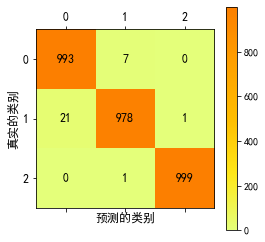

In [103]:
# 混淆矩阵
C = confusion_matrix(y_test, xgb_result)
ConfusionMatrixShow(C)

In [104]:
# from xgboost import plot_importance
# fig,ax = plt.subplots(figsize=(10,8), dpi=400)
# plot_importance(XGB,height=0.8, ax=ax ,
#                 max_num_features=10,
#                title='XGBoost特征重要性分析',
#                 xlabel='得分',ylabel='特征',
#                 importance_type='gain',show_values=False)

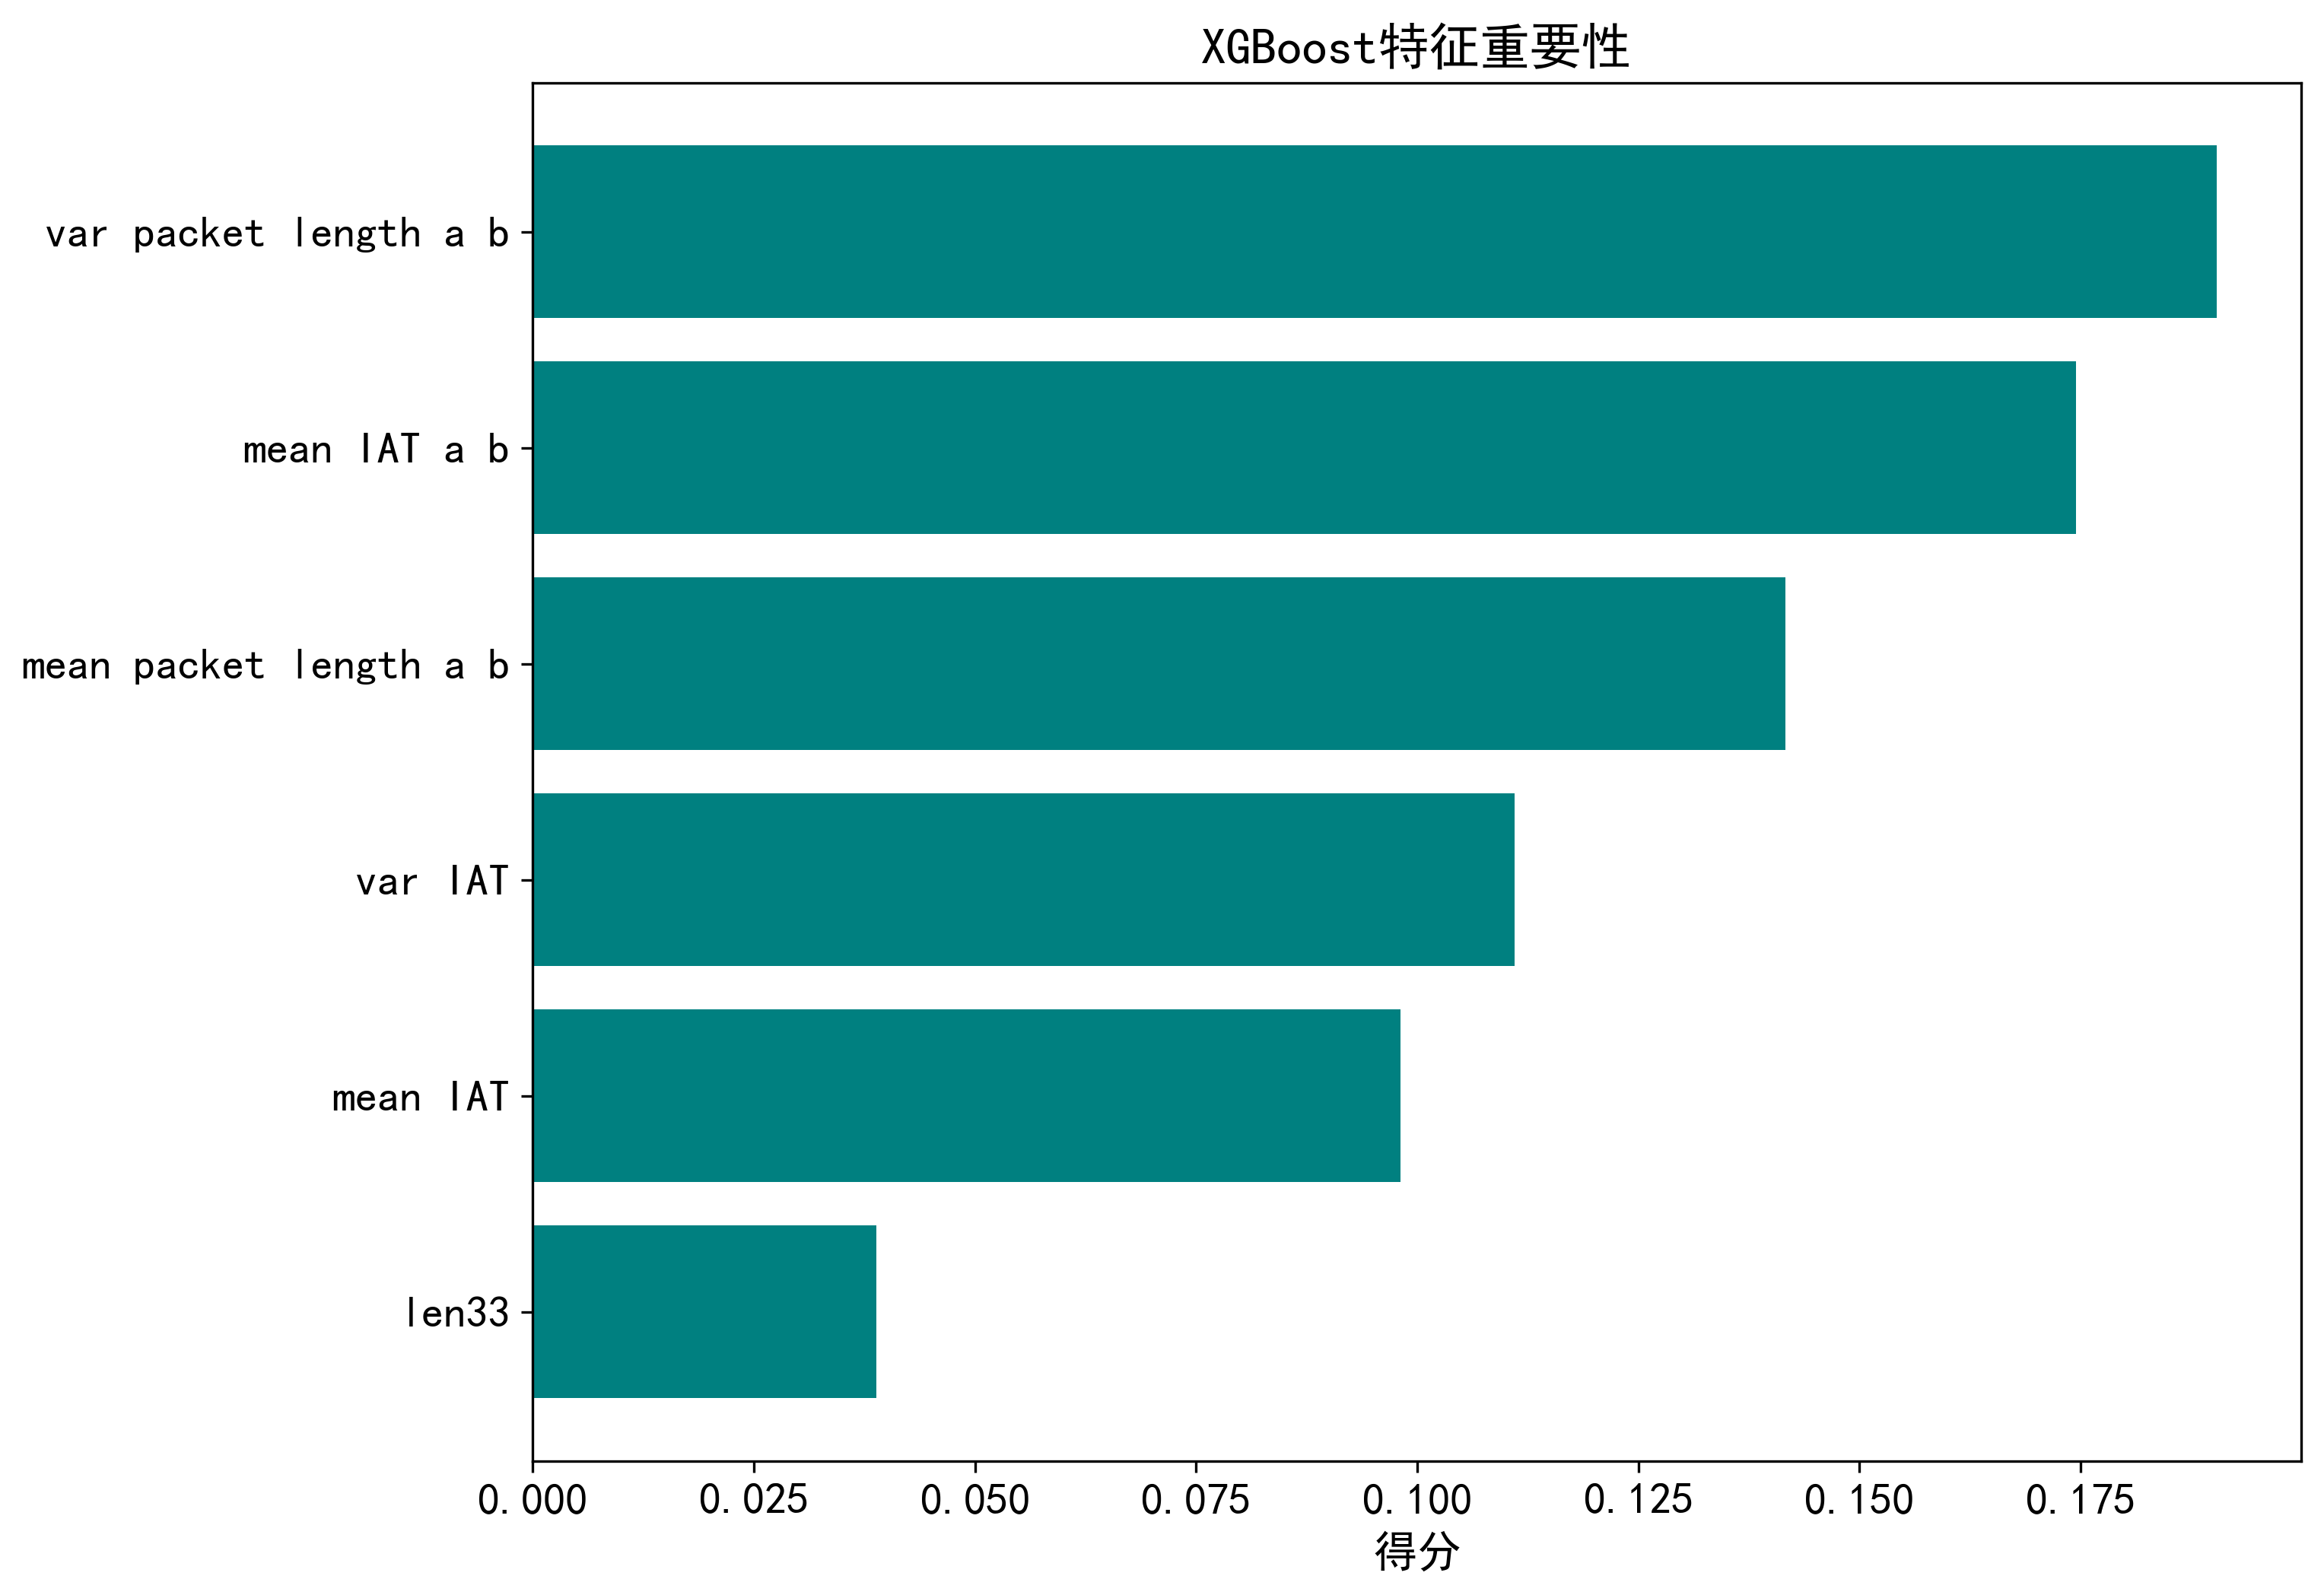

In [105]:
importances = XGB.feature_importances_
name = X_test.columns
sorted_idx = XGB.feature_importances_.argsort()
plt.figure(figsize=(10,8), dpi=300)
plt.barh(name[sorted_idx][44:50], XGB.feature_importances_[sorted_idx][44:50], color='teal')
plt.xlabel("得分", fontsize=14)
plt.title("XGBoost特征重要性", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [106]:
# 输出分类总结
xgb_report = classification_report(y_test,xgb_result,target_names=['ftp','http','scp'])
print(xgb_report)

              precision    recall  f1-score   support

         ftp       0.98      0.99      0.99      1000
        http       0.99      0.98      0.98      1000
         scp       1.00      1.00      1.00      1000

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



### 多层感知机

In [107]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(3,5), random_state=25, learning_rate_init=0.02)
mlp.fit(X_train, y_train)
mlp_result = mlp.predict(X_test)
print('MLP测试准确率为', accuracy_score(mlp_result, y_test))

MLP测试准确率为 0.5966666666666667


<Figure size 800x480 with 0 Axes>

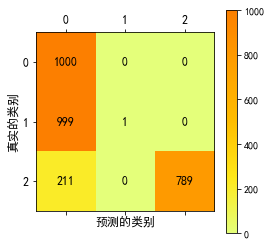

In [108]:
# 混淆矩阵
C = confusion_matrix(y_test, mlp_result)
ConfusionMatrixShow(C)

In [109]:
# 输出分类总结
mlp_report = classification_report(y_test,mlp_result,target_names=['ftp','http','scp'])
print(mlp_report)

              precision    recall  f1-score   support

         ftp       0.45      1.00      0.62      1000
        http       1.00      0.00      0.00      1000
         scp       1.00      0.79      0.88      1000

    accuracy                           0.60      3000
   macro avg       0.82      0.60      0.50      3000
weighted avg       0.82      0.60      0.50      3000



### 多项式朴素贝叶斯

In [110]:
from sklearn.naive_bayes import MultinomialNB
bay = MultinomialNB(alpha=0.23)
bay.fit(X_train, y_train)
baypred = bay.predict(X_test)
print('多项式贝叶斯测试准确率为', accuracy_score(y_test, baypred))

多项式贝叶斯测试准确率为 0.7133333333333334


<Figure size 800x480 with 0 Axes>

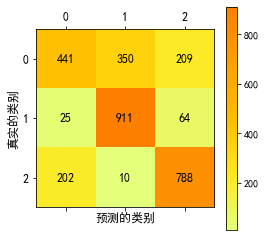

In [111]:
# 混淆矩阵
C = confusion_matrix(y_test, baypred)
ConfusionMatrixShow(C)

In [112]:
# 输出分类总结
bay_report = classification_report(y_test,baypred,target_names=['ftp','http','scp'])
print(bay_report)

              precision    recall  f1-score   support

         ftp       0.66      0.44      0.53      1000
        http       0.72      0.91      0.80      1000
         scp       0.74      0.79      0.76      1000

    accuracy                           0.71      3000
   macro avg       0.71      0.71      0.70      3000
weighted avg       0.71      0.71      0.70      3000



### 高斯贝叶斯分类器

In [113]:
from sklearn.naive_bayes import GaussianNB
gbay = GaussianNB(priors=None, var_smoothing=1e-07)
gbay.fit(X_train, y_train)
gbaypred = gbay.predict(X_test)
print('高斯贝叶斯测试准确率为', accuracy_score(y_test, gbaypred))

高斯贝叶斯测试准确率为 0.947


<Figure size 800x480 with 0 Axes>

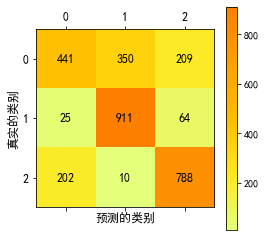

In [114]:
# 混淆矩阵
C = confusion_matrix(y_test, baypred)
ConfusionMatrixShow(C)

In [115]:
# 输出分类总结
bay_report = classification_report(y_test,baypred,target_names=['ftp','http','scp'])
print(bay_report)

              precision    recall  f1-score   support

         ftp       0.66      0.44      0.53      1000
        http       0.72      0.91      0.80      1000
         scp       0.74      0.79      0.76      1000

    accuracy                           0.71      3000
   macro avg       0.71      0.71      0.70      3000
weighted avg       0.71      0.71      0.70      3000



### 支持向量机

In [116]:
from sklearn.svm import SVC
svm = SVC(C=0.06, kernel = 'poly', degree=4)
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)
print('支持向量机测试准确率为', accuracy_score(y_test, svmpred))

支持向量机测试准确率为 0.8636666666666667


<Figure size 800x480 with 0 Axes>

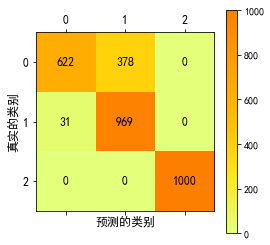

In [117]:
# 混淆矩阵
C = confusion_matrix(y_test, svmpred)
ConfusionMatrixShow(C)

In [118]:
# 输出分类总结
svm_report = classification_report(y_test,svmpred,target_names=['ftp','http','scp'])
print(svm_report)

              precision    recall  f1-score   support

         ftp       0.95      0.62      0.75      1000
        http       0.72      0.97      0.83      1000
         scp       1.00      1.00      1.00      1000

    accuracy                           0.86      3000
   macro avg       0.89      0.86      0.86      3000
weighted avg       0.89      0.86      0.86      3000



### k-近邻分类器 

In [119]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=100, weights='uniform', p=2)
clf.fit(X_train, y_train)
clfpred = clf.predict(X_test)
print('k-近邻分类器测试准确率为', accuracy_score(y_test, clfpred))

k-近邻分类器测试准确率为 0.9773333333333334


<Figure size 800x480 with 0 Axes>

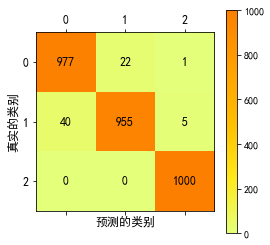

In [120]:
# 混淆矩阵
C = confusion_matrix(y_test, clfpred)
ConfusionMatrixShow(C)

In [121]:
# 输出分类总结
clf_report = classification_report(y_test,clfpred,target_names=['ftp','http','scp'])
print(clf_report)

              precision    recall  f1-score   support

         ftp       0.96      0.98      0.97      1000
        http       0.98      0.95      0.97      1000
         scp       0.99      1.00      1.00      1000

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



### 决策树分类器

In [122]:
from sklearn import tree
sln = tree.DecisionTreeClassifier(splitter='best', max_depth=2)
sln.fit(X_train, y_train)
slnpred = sln.predict(X_test)
print('决策树分类器测试准确率为', accuracy_score(y_test, slnpred))

决策树分类器测试准确率为 0.915


<Figure size 800x480 with 0 Axes>

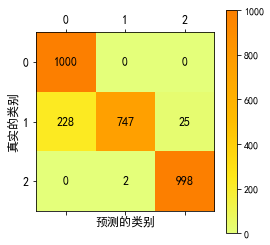

In [123]:
# 混淆矩阵
C = confusion_matrix(y_test, slnpred)
ConfusionMatrixShow(C)

In [124]:
# 输出分类总结
sln_report = classification_report(y_test,slnpred,target_names=['ftp','http','scp'])
print(sln_report)

              precision    recall  f1-score   support

         ftp       0.81      1.00      0.90      1000
        http       1.00      0.75      0.85      1000
         scp       0.98      1.00      0.99      1000

    accuracy                           0.92      3000
   macro avg       0.93      0.92      0.91      3000
weighted avg       0.93      0.92      0.91      3000



### 随机森林

In [125]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1, max_depth=2)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
print('随机森林测试准确率为', accuracy_score(y_test, rfcpred))

随机森林测试准确率为 0.9663333333333334


<Figure size 800x480 with 0 Axes>

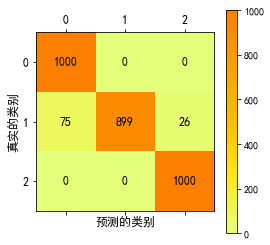

In [126]:
# 混淆矩阵
C = confusion_matrix(y_test, rfcpred)
ConfusionMatrixShow(C)

In [127]:
# 输出分类总结
rfc_report = classification_report(y_test,rfcpred,target_names=['ftp','http','scp'])
print(rfc_report)

              precision    recall  f1-score   support

         ftp       0.93      1.00      0.96      1000
        http       1.00      0.90      0.95      1000
         scp       0.97      1.00      0.99      1000

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



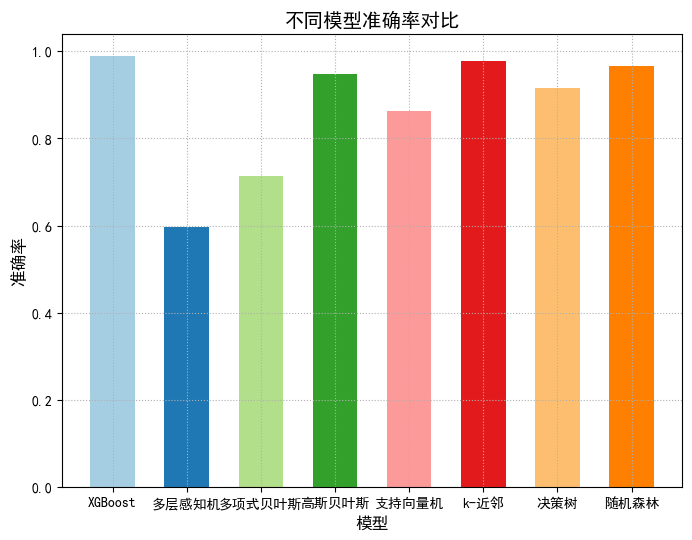

In [128]:
plt.figure(figsize=(8, 6), dpi=100)
n = 8
X = np.arange(n) + 1
label = ['XGBoost', '多层感知机', '多项式贝叶斯', '高斯贝叶斯', '支持向量机', 'k-近邻', '决策树', '随机森林']
Y1 = [accuracy_score(xgb_result,y_test), accuracy_score(mlp_result,y_test), 
      accuracy_score(baypred,y_test), accuracy_score(gbaypred,y_test), 
      accuracy_score(svmpred, y_test), accuracy_score(clfpred,y_test),
      accuracy_score(slnpred, y_test), accuracy_score(rfcpred,y_test),
     ]
plt.bar(X, Y1, width=0.6, color=sns.color_palette('Paired', 8))
plt.title('不同模型准确率对比', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('模型', fontsize=12)
plt.ylabel('准确率', fontsize=12)
plt.xticks(X, label)
plt.grid(linestyle=":")
plt.show()